# IA Notebook #3 - Gradient Descent
O traducido al español "Descenso del Gradiente".

[Enlace al vídeo](https://youtu.be/-_A_AAxqzCg)

In [1]:
import numpy as np
import scipy as sc

import matplotlib.pyplot as plt

#### La función que usaremos será:
<blockquote>$F_{(x, y)} = sin(\frac{1}{2}x^2 - \frac{1}{4}y^2 + 3) cos(2 x + 1 - e^y)$</blockquote>

#### Recordar que colocando el nombre del método o "función" seguido del signo "?" nos saldrá una ayuda.

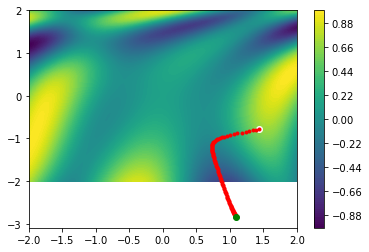

-0.9999993222047632


In [4]:
#th equivale a z en el camp del ML, th también viene a ser el parámetro de nuestra función "func"
func = lambda th: np.sin(0.5*th[0]**2 - 0.25*th[1]**2 + 3) * np.cos(2*th[0] + 1 - np.e**th[1])

#Variable que nos permitirá más adelante, definir la cantidad de números con la que vamos a trabajar
res=100
#Se podría decir que es como la "resolución".

#Con esto definimos un vector (matriz:1xres) que tendrá valores variados desde -2 a 2 de forma ordenada
# y la cantidad de valores está determinado por la variable "res"
_x=np.linspace(-2, 2, res)
_y=np.linspace(-2, 2, res)

#Creamos una matriz que pueda almacenar todos los resultados de evaluar la función
_z=np.zeros((res, res))

for indiceX, X in enumerate(_x): #enumarate devuelve el índice y el valor en ese índice
    for indiceY, Y in enumerate(_y): #por eso hay dos variables
        #La matriz _z tiene "res" filas (eje y) por "res" columnas (eje x)
        _z[indiceY, indiceX] = func([X, Y])

#El método contourf permite hacer un dibujado como si fuese un solido, lo rellena (fill)
plt.contourf(_x, _y, _z, 100)
#plt.contour(_x, _y, _z, 100)
plt.colorbar()

# Ahora a generar un punto aleatorio sobre esta supericie:
#Primero le digo cuantos valores aleatorios quiero y como viene por defecto de 0 a 1
#Le hacemos algunas operaciones para que vaya de acuerdo a nuestro rango de -2 a 2
theta = np.random.rand(2)*4-2

#Hacemos una copia
_T=np.copy(theta)

h=0.001 #Variable que se usará para incrementar ligeramente nuestra función y así calcular la pendiente
#Learning Ratio o Razón de Aprendizaje: O Learning Rate o Velocidad de Aprendizaje:(No se aprecia bien lo que dice pero suena más a lo segundo)
lr=0.001 #En otras palabras, este sería como la distancia que recorremos a cada iteración, a cada paso.

#(Este comentario se movió para explicar los parámetros de la función plot)
#Ahora lo dibujamos, primero le indico que sea un gran punto con "o" y luego que sea de color "red":
#Con esto, nos dibujará el punto inicial del que partirá:
plt.plot(theta[0], theta[1], "o", c="white")

#Creamos esta variable (matriz) con dos componentes:
gradiente=np.zeros(2)

#Repetimos todo el proceso la cantidad de veces que sea necesaria.
for i in range(10000): #Ya que a mayor iteraciones más se aproximará al resultado buscado.
    for indiceZeta, zeta in enumerate(theta):
        #Para que todo esto funcione repitiendolo más de una sola vez, es necesario:
        _T=np.copy(theta) #Así lo volvemos a evaluar con el valor actualizado de theta.

        #Le incremento un valor pequeño:
        _T[indiceZeta] = _T[indiceZeta] + h
        #Para ahora calcular la pendiente o derivada parcial, ya que se aplica a una de las dos variables:
        derivParcial=(func(_T)-func(theta))/h

        gradiente[indiceZeta]=derivParcial

    #Actualizamos nuestra variable theta:
    theta = theta - lr*gradiente
    #Para ver númericamente como va variando la función, vamos a ir imprimiendo cada valor que dé como resultado:
    #print(func(theta))
    #Ahora, para ver un resultado gráfico, haremos lo siguiente:
    if i%50==0: #Cada 100 iteraciones, entrará al if
        plt.plot(theta[0], theta[1], ".", c="red") #Y dibujará la nueva posición del punto.

#Por ultimo, dibujaremos dónde acaba el punto después de todas las iteraciones:
plt.plot(theta[0], theta[1], "o", c="green")
#Y ahora lo mostramos en la pantalla:
plt.show()

#Sabiendo que es un producto entre seno y coseno, el rango va desde -1 a 1, por lo tanto, el valor  mínimos sería -1
#Así que para saber que valor toma al final, hacemos:
print(func(theta))